# Gaussian Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The aim is to construct a classifier that predicts whether a user will buy a new SUV given information of his/her Age and Salary.


In [2]:

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_0)
X_test = sc.transform(X_test_0)

/home/jenazads/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [7]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


## Visualising the Training set results

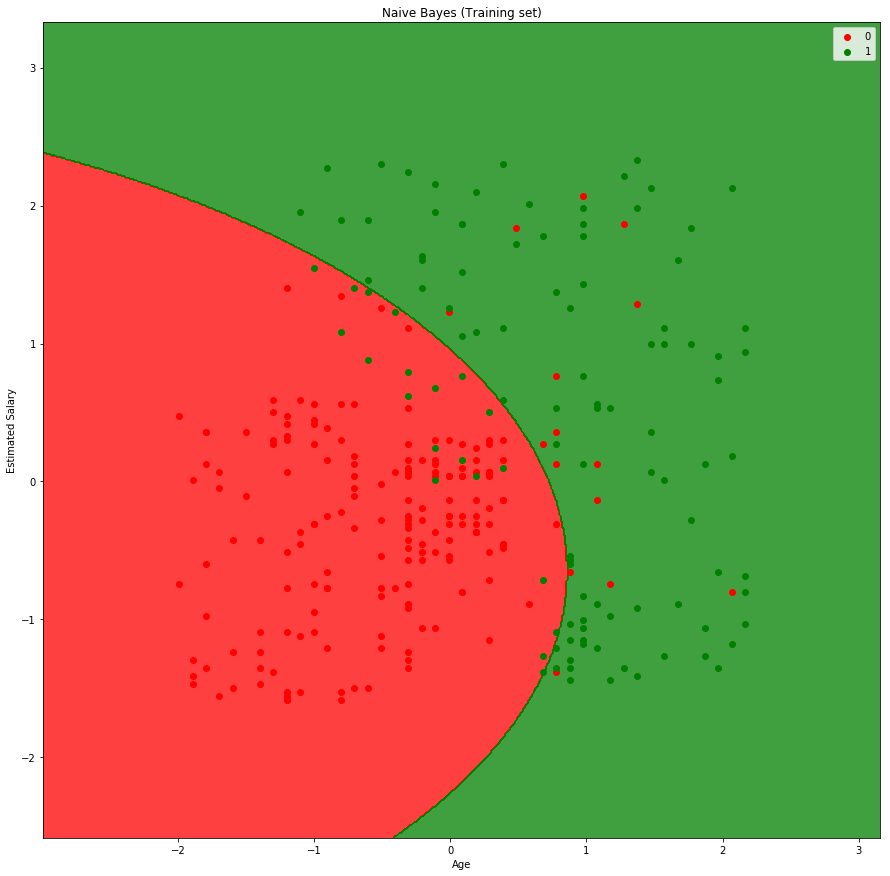

In [8]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

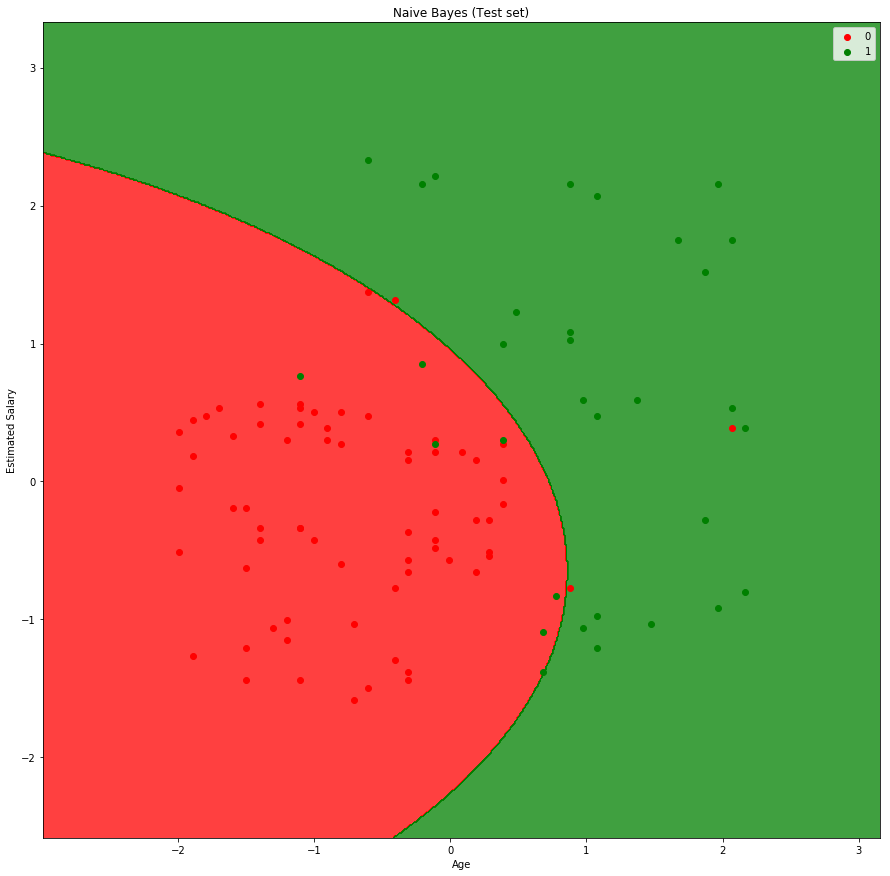

In [9]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Excercise: Try your own Gaussian Naive Bayes algorithm 

- Hint: compute the mean and standard deviation for each class value and variable|class

- Use a Gaussian function to estimate the probability of a specific attribute value. To do so, you can use the mean and standard deviation computed for that attribute from the training data.

- You should obtain the same confusion matrix of sklearn algorithm


In [10]:
# Taking initial non normalized data
X_train=X_train_0*1
X_test=X_test_0*1
print(X_train.shape)
print(y_train.shape)

(300, 2)
(300,)


In [11]:
# One output with multiple classes
Nout=np.max(y_train)-np.min(y_train)+1
# Mean and variance saved for each combination of input and output
P=np.zeros((Nout*X_train.shape[1],2))
prob_outs=np.zeros(Nout)

In [12]:
# Function to get mean and variance for a vector
def parameters(data):
    u=np.mean(data)
    v=np.var(data)
    return u,v
# Function to getting the probability in a gaussian distribution
def gaussian(var,u,v):
    prob=(1/np.sqrt(2*np.pi*v))*np.exp(-(var-u)*(var-u)/(2*v))
    return(prob)

In [13]:
# Getting and saving the parameters for each gaussin distribution
ind=0
for out in range(Nout):
    loc=np.where(y_train==out)
    prob_outs[out]=len(loc[0])/X_train.shape[0]
    for var_in in range(X_train.shape[1]):
        data=X_train[loc,var_in]
        P[ind,:]=parameters(data)
        ind+=1

In [14]:
# Function used to predict with gaussian nieve bayes algorithm
def prediction(var):
    preds=np.zeros(Nout)
    for out in range(Nout):
        prob=prob_outs[out]
        for var_in in range(X_train.shape[1]):
            ind=X_train.shape[1]*out+var_in
            prob*=gaussian(var[var_in],P[ind,0],P[ind,1])
        preds[out]=prob
    return np.argmax(preds)
            

In [15]:
# Predictions for testing data
ind=0
predictions_test=np.zeros(X_test.shape[0])
for var in X_test:
    predictions_test[ind]=prediction(var)
    print("Prediction: ",predictions_test[ind],"--- Real: ",y_test[ind])
    prediction(var)
    ind+=1

Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  1
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  1
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  1
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  1
Prediction:  0.0 --- Real:  0
Prediction:  1.0 --- Real:  1
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  0
Prediction:  0.0 --- Real:  1
Prediction:  1.0 --- Real:  1
Prediction

In [16]:
#Getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions_test)
print(cm)

[[65  3]
 [ 7 25]]


In [17]:
# Getting all asocied precisions
print("precision:", np.matrix.trace(cm)/np.sum(cm)*100,"%")
for i in range(Nout):
    print("precision finding output ",i,": ", cm[i,i]/np.sum(cm,axis=1)[i]*100,"%")

precision: 90.0 %
precision finding output  0 :  95.58823529411765 %
precision finding output  1 :  78.125 %
